## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?



In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

from scipy.stats.contingency import association

In [6]:
# Loading the the csv of amzaon uk
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [7]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [100]:
# 1. **Crosstab Analysis**:
#     - Create a crosstab between the product `category` and the `isBestSeller` status.
    
#     - Are there categories where being a best-seller is more prevalent? 
    	
#     	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


crosstab_category_is_best_seller = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_category_is_best_seller.sort_values(by= True, ascending=False)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [71]:



# 2. **Statistical Tests**:
#     - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#     - Compute Cramér's V to understand the strength of association between best-seller status and category.


chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_category_is_best_seller)

chi2_statistic, chi2_p_value


(36540.20270061387, 0.0)

In [72]:

# 2. **Statistical Tests**:
#     - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#     - Compute Cramér's V to understand the strength of association between best-seller status and category.


association(crosstab_category_is_best_seller, method="cramer")

0.1222829439760564

In [103]:

crosstab_category_is_best_seller_reset_index = pd.crosstab(df['category'], df['isBestSeller']).reset_index()






In [55]:
crosstab_category_proportion = crosstab_category_is_best_seller_reset_index[True]/(crosstab_category_is_best_seller_reset_index[True]+crosstab_category_is_best_seller_reset_index[False])


crosstab_category_proportion

0      0.004032
1      0.000492
2      0.020000
3      0.000589
4      0.011811
         ...   
291    0.028000
292    0.020921
293    0.011985
294    0.010209
295    0.000000
Length: 296, dtype: float64

In [107]:

crosstab_category_is_best_seller_reset_index['category_proportion'] = crosstab_category_proportion

crosstab_category_is_best_seller_reset_index



crosstab_result = crosstab_category_is_best_seller_reset_index.sort_values(by='category_proportion', ascending=False)
crosstab_result.head()

crosstab_result

isBestSeller,category,False,True,category_proportion
109,Grocery,9008,556,0.058135
254,Smart Home Security & Lighting,98,6,0.057692
126,Health & Personal Care,9017,552,0.057686
185,Mobile Phone Accessories,248,11,0.042471
229,Power & Hand Tools,8353,306,0.035339


<Axes: xlabel='category'>

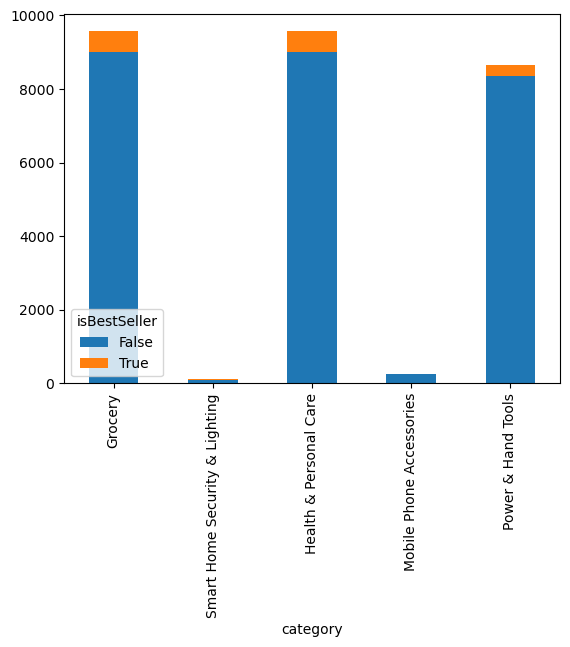

In [118]:
# 3. **Visualizations**:
# 	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

crosstab_result[['category',False,True]].head().plot(kind="bar", stacked=True, x="category" )


normalize = 'all'

In [ ]:

# ### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

# **Objective**: Investigate how different product categories influence product prices.

# 0. **Preliminary Step: Remove outliers in product prices.**

# 	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
# 	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

# 1. **Violin Plots**:
#     - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
#     - Which product category tends to have the highest median price? Don't filter here by top categories.

# 2. **Bar Charts**:
#     - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#     - Which product category commands the highest average price? Don't filter here by top categories.

# 3. **Box Plots**:
#     - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#     - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
